In [ ]:
!pip install qiskit
!pip install pylatexenc

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

Please enter the image path: /content/circle.jpg
The original size of the image is 640 x 640 pixels.
Do you want to resize the image? (yes/no): yes
Enter the new dimension of the image (n x n): 8


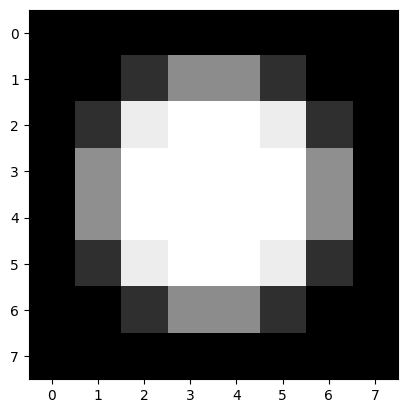

In [ ]:
#Part 1: Importing necessary libraries and defining the function to process the image
import plotly.graph_objects as go
from qiskit import QuantumCircuit, Aer, execute
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import depolarizing_error, pauli_error
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt


# Define a function to process the image
def process_image(image_path):
    image = Image.open(image_path).convert('L') # Open the image and convert it to grayscale
    image_data = np.array(image.getdata(), dtype=np.uint8).reshape(image.size[::-1])  # Transform the image data into a numpy array
    return image_data, image.size  # Return the image data and the original size of the image


#Part 2: Asking the \user for image path and processing the image
image_path = input("Please enter the image path: ")
image_data, original_size = process_image(image_path)  # Process the image
print(f"The original size of the image is {original_size[0]} x {original_size[1]} pixels.")

# Ask user if they want to resize the image
resize_choice = input("Do you want to resize the image? (yes/no): ")
if resize_choice.lower() == 'yes':
    n = int(input("Enter the new dimension of the image (n x n): "))
    image_data = Image.fromarray(image_data).resize((n, n))
    image_data = np.array(image_data)
else:
    n = min(original_size)



#Part 4: Creating FRQI, NEQR, and QHED circuits
plt.imshow(image_data,cmap='gray')
image_data = image_data.flatten()
n = int(len(image_data)**0.5)




In [ ]:

# Import the modules and tools needed for the work
from qiskit import IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, QuantumRegister
from qiskit.qasm import pi
from qiskit.tools.visualization import plot_histogram, circuit_drawer
from qiskit import execute, Aer, BasicAer
import numpy as np
import random
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mutual_info_score, r2_score
from qiskit.circuit.library.standard_gates import RYGate, RYYGate
import cv2
import pandas as pd

In [ ]:
def calculate_psnr(img1, img2):
    # Ensure the images have the same shape
    assert img1.shape == img2.shape, "Images must have the same dimensions"
    img1 = img1/np.max(img1)*255
    img2 = img2/np.max(img2)*255
    # Calculate the Mean Square Error (MSE)
    mse = np.mean((img1 - img2) ** 2)

    # If the MSE is zero, the images are identical and the PSNR is infinite
    if mse == 0:
        return float('inf')

    # Calculate the maximum pixel value
    max_pixel = 255.0

    # Calculate and return the PSNR
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

In [ ]:
def hadamard(circ, n):
  for i in n:
    circ.h(i)

def change(state, new_state):
  n = len(state)  # n is the length of the binary string
  c = np.array([])  # create an empty array
  for i in range(n):  # start to iterate n times
    if state[i] != new_state[i]:  # here we check if the position i in the
                                  # binary string is different
      c = np.append(c, int(i))

  if len(c) > 0:
    return c.astype(int)
  else:
    return c

def binary(circ, state, new_state):
  # state is the string in binary format that tells us the actual state of the pixels
  # state = '000000'
  c = change(state, new_state)
  if len(c) > 0:
    # Modified section. Added the -1 and the np.abs
    circ.x(np.abs(c-5))
  else:
    pass

def cnri(circ, n, t, theta):
  #rq = circuit.qubits
  controls = len(n)
  cry = RYGate(2*theta).control(controls)
  aux = np.append(n, t).tolist()
  circ.append(cry, aux)



class FRQI:
    """FRQI class"""

    def __init__(self):
        self.qr = QuantumRegister(7,'q')
        self.cr = ClassicalRegister(7,'c')
        self.qc = QuantumCircuit(self.qr,self.cr)

    def _prepare_image(self, image: np.ndarray):
        self.image = image.flatten()
        normalized_pixels = self.image/255.0
        angles = np.arcsin(normalized_pixels)
        return angles

    def image_quantum_circuit(self, image: np.ndarray, measurements: bool = False):
        angels = self._prepare_image(image)
        self.frqi(self.qc, [0,1,2,3,4,5], 6, angels)
        if measurements:
          self.qc.measure([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])
        return self.qc


    def frqi(self,circ,n ,t, angles):
      hadamard(circ, n)
      j = 0
      for i in angles:
        state = '{0:06b}'.format(j-1)
        new_state = '{0:06b}'.format(j)
        if j == 0:
          cnri(circ, n, t, i)
        else:
          binary(circ, state, new_state)
          cnri(circ, n, t, i)
        j += 1

    def reconstruct_image_from_frqi_result(self, counts: dict,shots=1024):
        retrieve_image = np.array([])
        for i in range(64):
          try:
            s = format(i, '06b')
            new_s = '1' + s
            retrieve_image = np.append(retrieve_image,np.sqrt(counts[new_s]/shots))
          except KeyError:
            retrieve_image = np.append(retrieve_image,[0.0])

        retrieve_image *=  8.0*255.0
        retrieve_image = retrieve_image.astype('int')
        retrieve_image = retrieve_image.reshape((8,8))
        return retrieve_image


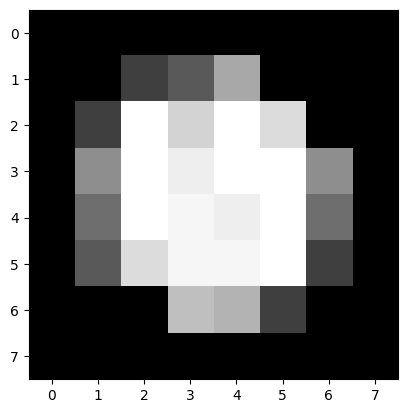

20.74573376572848


In [ ]:
frqi_class = FRQI()
simulator = Aer.get_backend('qasm_simulator')
qc_gray = frqi_class.image_quantum_circuit(image_data,True)
result = execute(qc_gray, simulator, shots=1024).result()
counts = result.get_counts()
retrieve_image = frqi_class.reconstruct_image_from_frqi_result(counts=counts,shots=1024)
plt.imshow(retrieve_image, cmap='gray', vmin=0, vmax=255)
plt.savefig("FRQI.png")
plt.show()
print(calculate_psnr(image*255,retrieve_image))

In [ ]:
print(np.max(image))
print(np.max(retrieve_image))
calculate_psnr(image, retrieve_image)

255
305


19.016184524287173

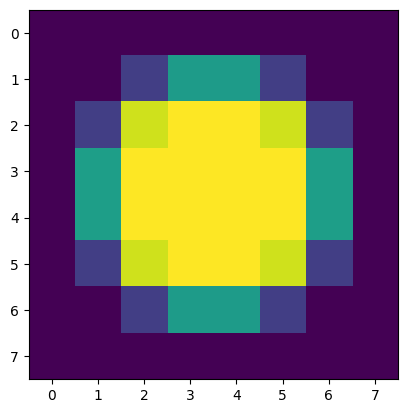

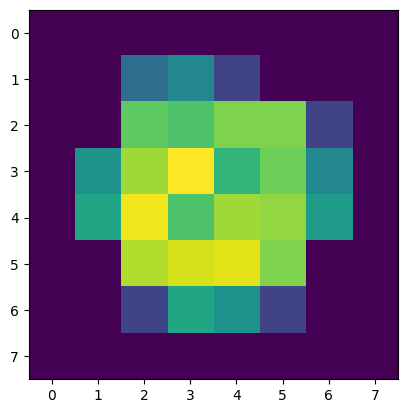

In [ ]:
plt.imshow(image)
plt.show()
plt.imshow(retrieve_image)

In [ ]:
def get_noise(p_error):
    error_gate1 = depolarizing_error(p_error, 1)
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate1, ['h', 'x'])
    return noise_model

from qiskit.providers.aer.noise.errors import depolarizing_error, pauli_error

def get_noise_bit_flip(p_error):
    error_gate1 = pauli_error([('X', p_error), ('I', 1 - p_error)])
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate1, ['h', 'x'])
    return noise_model

def get_noise_phase_flip(p_error):
    error_gate1 = pauli_error([('Z', p_error), ('I', 1 - p_error)])
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate1, ['h', 'x'])
    return noise_model

In [ ]:
PSNR_shots_frqi = []
image = image_data.reshape(8,8)
for shots in [16,64,128,512,1024,2048,10240]:
  frqi_class = FRQI()
  simulator = Aer.get_backend('qasm_simulator')
  qc_gray = frqi_class.image_quantum_circuit(image_data,True)
  result = execute(qc_gray, simulator, shots=shots).result()
  counts = result.get_counts()
  retrieve_image = frqi_class.reconstruct_image_from_frqi_result(counts=counts,shots=shots)
  PSNR_shots_frqi.append(calculate_psnr(image,retrieve_image))

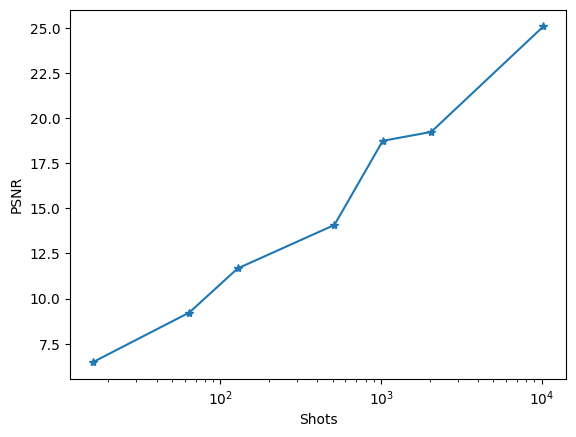

In [ ]:
plt.plot([16,64,128,512,1024,2048,10240],PSNR_shots_frqi,'*-')
plt.xscale('log')
plt.xlabel("Shots")
plt.ylabel("PSNR")
plt.savefig('FRQI_shots.pdf')


In [ ]:
PSNR_depol_frqi = []
PSNR_bit_frqi = []
PSNR_phase_frqi = []
image = image_data.reshape(8,8)
for error_percentage in [0.01,0.02,0.05,0.1,0.2]:
  noise_model = get_noise(error_percentage)

  frqi_class = FRQI()
  simulator = Aer.get_backend('qasm_simulator')
  qc_gray = frqi_class.image_quantum_circuit(image_data.reshape(8,8),True)
  result = execute(qc_gray, simulator, shots=1024, noise_model=noise_model).result()
  counts = result.get_counts()
  counts_noise = counts
  retrieve_image = frqi_class.reconstruct_image_from_frqi_result(counts=counts,shots=1024)
  PSNR_depol_frqi.append(calculate_psnr(image,retrieve_image))
  print(calculate_psnr(image,retrieve_image))

  noise_model = get_noise_bit_flip(error_percentage)

  frqi_class = FRQI()
  simulator = Aer.get_backend('qasm_simulator')
  qc_gray = frqi_class.image_quantum_circuit(image_data.reshape(8,8),True)
  result = execute(qc_gray, simulator, shots=1024, noise_model=noise_model).result()
  counts = result.get_counts()
  counts_noise = counts
  retrieve_image = frqi_class.reconstruct_image_from_frqi_result(counts=counts,shots=1024)
  PSNR_bit_frqi.append(calculate_psnr(image,retrieve_image))
  print(calculate_psnr(image,retrieve_image))

  noise_model = get_noise_phase_flip(error_percentage)
  frqi_class = FRQI()
  simulator = Aer.get_backend('qasm_simulator')
  qc_gray = frqi_class.image_quantum_circuit(image_data.reshape(8,8),True)
  result = execute(qc_gray, simulator, shots=1024, noise_model=noise_model).result()
  counts = result.get_counts()
  counts_noise = counts
  retrieve_image = frqi_class.reconstruct_image_from_frqi_result(counts=counts,shots=1024)
  PSNR_phase_frqi.append(calculate_psnr(image,retrieve_image))
  print(calculate_psnr(image,retrieve_image))


15.512071580862191
15.125709256583523
18.273668105638396
14.834610470087522
11.941695661236224
17.634184288828365
11.840054044558999
8.975799156568936
18.468610835319836
9.98875004008137
8.82412603646822
19.795437094286076
7.38962322587121
6.357030572606131
18.54059088397802


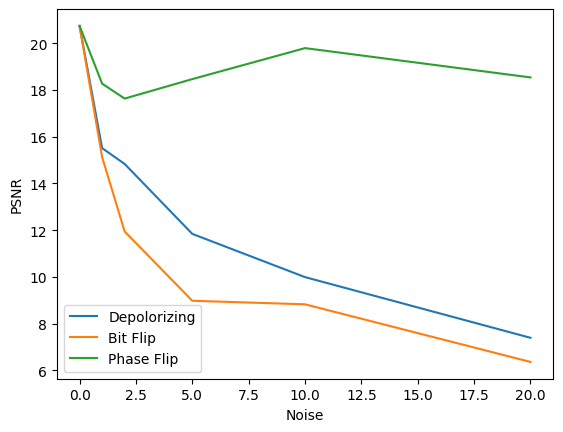

In [ ]:
plt.plot(np.array([0,0.01,0.02,0.05,0.1,0.2])*100,[20.74573376572848]+PSNR_depol_frqi,label='Depolorizing')
plt.plot(np.array([0,0.01,0.02,0.05,0.1,0.2])*100,[20.74573376572848]+PSNR_bit_frqi,label='Bit Flip')
plt.plot(np.array([0,0.01,0.02,0.05,0.1,0.2])*100,[20.74573376572848]+PSNR_phase_frqi,label='Phase Flip')
plt.legend()
plt.xlabel("Noise")
plt.ylabel("PSNR")
plt.savefig("noise_frqi.pdf")

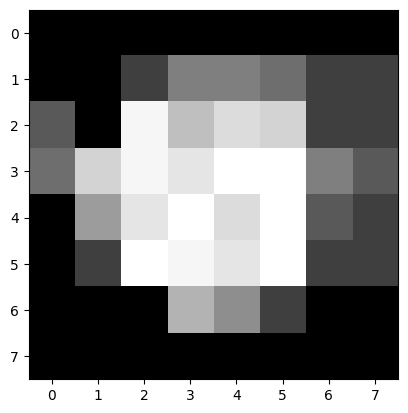

16.840792587030514


In [ ]:

noise_model = get_noise(0.01)



frqi_class = FRQI()
simulator = Aer.get_backend('qasm_simulator')
qc_gray = frqi_class.image_quantum_circuit(image_data.reshape(8,8),True)
result = execute(qc_gray, simulator, shots=1024, noise_model=noise_model).result()
counts = result.get_counts()
counts_noise = counts
retrieve_image = frqi_class.reconstruct_image_from_frqi_result(counts=counts,shots=1024)
plt.imshow(retrieve_image, cmap='gray', vmin=0, vmax=255)
plt.savefig("FRQI_depol.png")
plt.show()
print(calculate_psnr(image*255,retrieve_image))

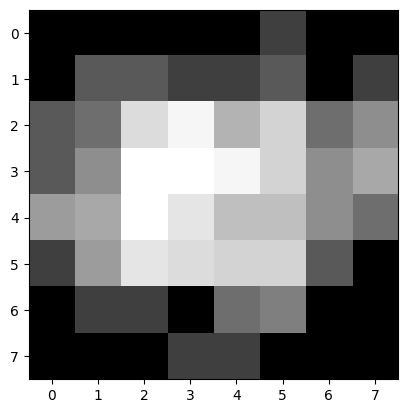

12.880538977813


In [ ]:

noise_model = get_noise_bit_flip(0.01)


frqi_class = FRQI()
simulator = Aer.get_backend('qasm_simulator')
qc_gray = frqi_class.image_quantum_circuit(image_data.reshape(8,8),True)
result = execute(qc_gray, simulator, shots=1024, noise_model=noise_model).result()
counts = result.get_counts()
counts_noise = counts
retrieve_image = frqi_class.reconstruct_image_from_frqi_result(counts=counts,shots=1024)
plt.imshow(retrieve_image, cmap='gray', vmin=0, vmax=255)
plt.savefig("FRQI_bit_flip.png")
plt.show()
print(calculate_psnr(image*255,retrieve_image))

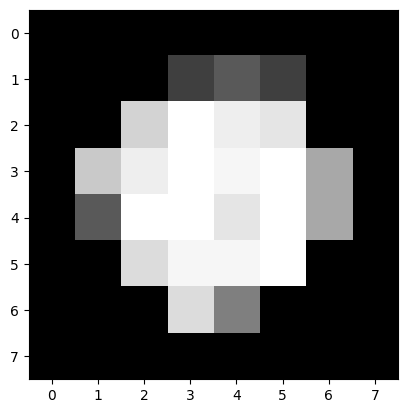

In [ ]:


noise_model = get_noise_phase_flip(0.01)
frqi_class = FRQI()
simulator = Aer.get_backend('qasm_simulator')
qc_gray = frqi_class.image_quantum_circuit(image_data.reshape(8,8),True)
result = execute(qc_gray, simulator, shots=1024, noise_model=noise_model).result()
counts = result.get_counts()
counts_noise = counts
retrieve_image = frqi_class.reconstruct_image_from_frqi_result(counts=counts,shots=1024)
plt.imshow(retrieve_image, cmap='gray', vmin=0, vmax=255)
plt.savefig("FRQI_phase_flip.png")
plt.show()

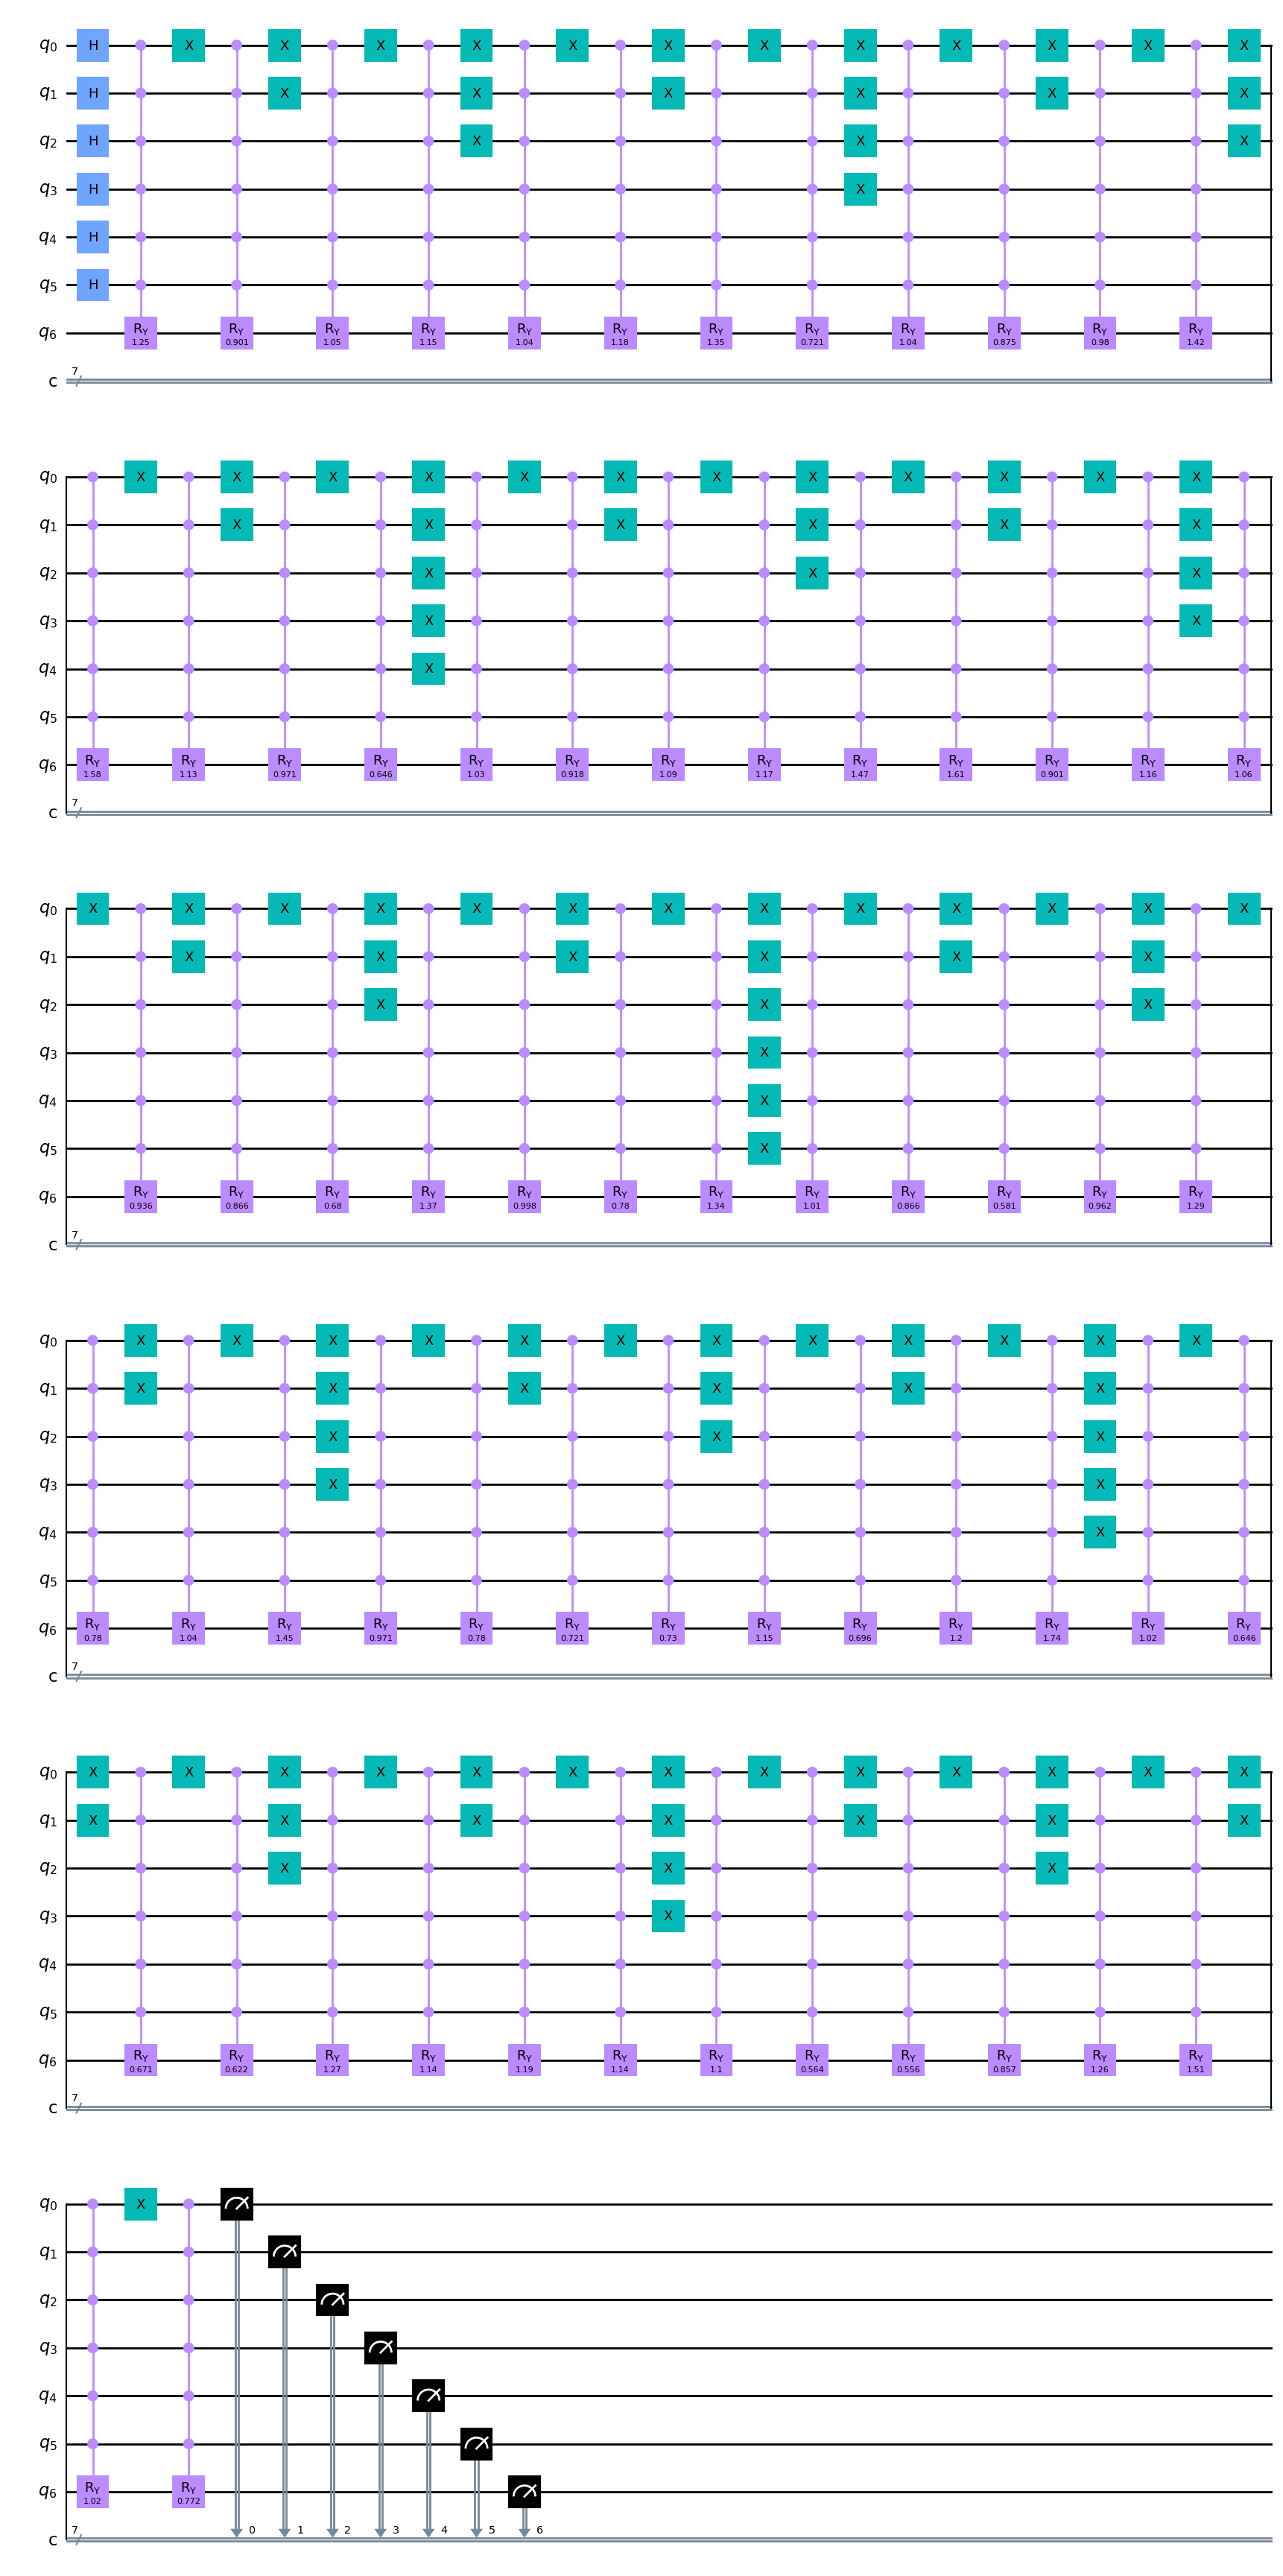

In [ ]:
qc_gray.draw(output = 'mpl', filename='FRQI.pdf')


In [ ]:

def to_hex(counts):
  hex_dictionary = {hex(int(key, 2))[2:]: value for key, value in counts.items()}
  new_dictionary = {key if len(key) > 1 else '0'+key: value for key, value in hex_dictionary.items()}
  return new_dictionary

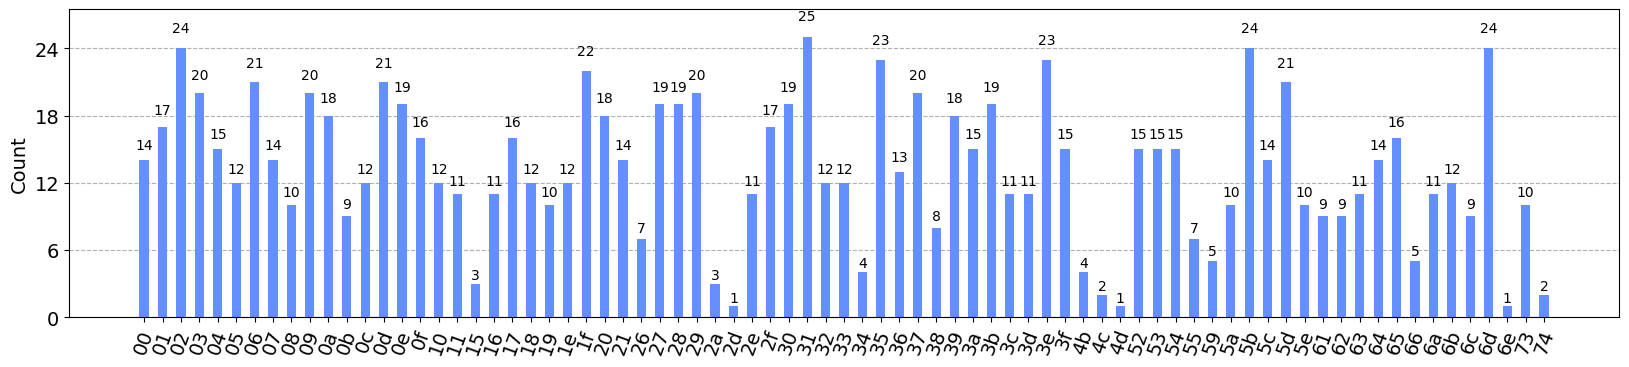

In [ ]:
fig, ax = plt.subplots(figsize=(20,4))
plot_histogram(to_hex(counts),ax=ax)
plt.savefig('FRQI_bar.pdf', bbox_inches='tight')



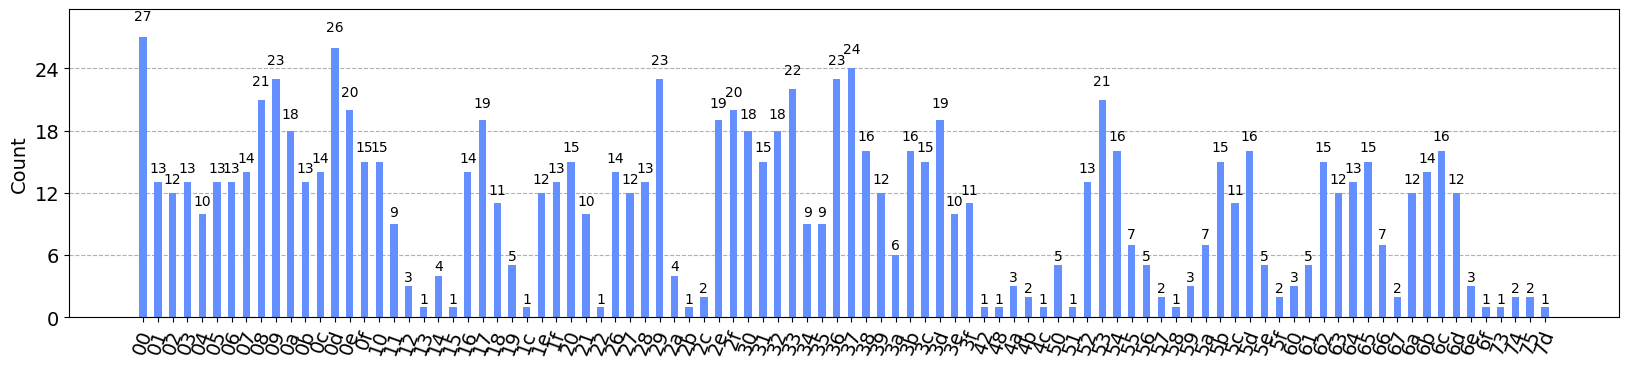

In [ ]:
fig, ax = plt.subplots(figsize=(20,4))
plot_histogram(to_hex(counts_noise),ax=ax)
plt.savefig('FRQI_depol_bar.pdf', bbox_inches='tight')
# plt.savefig("FRQI_depol_bar.pdf")

In [ ]:
print(np.sum(list(counts.values())))

1024


In [ ]:
from __future__ import annotations
import numpy as np
from qiskit.circuit import ClassicalRegister, QuantumCircuit, QuantumRegister


class NEQR:
    """NEQR class"""

    def __init__(self) -> NEQR:
        pass

    def image_quantum_circuit(
        self, image: np.ndarray, measurements: bool = False
    ) -> QuantumCircuit:
        """Return a NEQR circuit that encodes the image given as input.

        Args:
            image (np.ndarray): The image that will be encoded.
            measurements (bool, optional): If we want to add measurements in the circuit.
                                           Defaults to False.

        Returns:
            QuantumCircuit: The NEQR circuit of the input image.
        """

        qc = self._initialize_circuit(image=image)
        qc = self._encode_image(quantum_circuit=qc, image=image)
        if measurements:
            qc = self._add_measurements(quantum_circuit=qc)

        return qc

    def _add_measurements(self, quantum_circuit: QuantumCircuit) -> QuantumCircuit:
        """Add measurements in NEQR circuit.

        Args:
            quantum_circuit (QuantumCircuit): A quantum circuit that we want to
                                              add measurements.

        Returns:
            QuantumCircuit: A quantum circuit with measurements.
        """

        qc = quantum_circuit
        for i in range(len(qc.qregs)):
            qc.measure(qubit=qc.qregs[i], cbit=qc.cregs[i])
            if i != len(qc.qregs) - 1:
                qc.barrier()

        return qc

    def _initialize_circuit(self, image: np.ndarray) -> QuantumCircuit:
        """Initialize the NEQR circuit.

        Args:
            image (np.ndarray): The input image.

        Returns:
            QuantumCircuit: The NEQR circuit initialized.
        """
        intensity = QuantumRegister(size=8, name="intensity")
        bits_intensity = ClassicalRegister(size=8, name="bits_intensity")

        if len(image.shape) == 3:
            if image.shape[2] == 3:
                num_qubits = int(np.ceil(np.log2(image.shape[0] * image.shape[1])))
                qubits_index = QuantumRegister(size=num_qubits, name="pixel_indexes")
                bits_index = ClassicalRegister(
                    size=num_qubits, name="bits_pixel_indexes"
                )
                rgb = QuantumRegister(size=2, name="rgb")
                rgb_bits = ClassicalRegister(size=2, name="bits_rgb")

                qc = QuantumCircuit(
                    intensity, qubits_index, rgb, bits_intensity, bits_index, rgb_bits
                )
                qc.h(qubit=rgb)
            else:
                num_qubits = int(
                    np.ceil(np.log2(image.shape[0] * image.shape[1] * image.shape[2]))
                )
                qubits_index = QuantumRegister(size=num_qubits, name="pixel_indexes")
                bits_index = ClassicalRegister(
                    size=num_qubits, name="bits_pixel_indexes"
                )
                qc = QuantumCircuit(intensity, qubits_index, bits_intensity, bits_index)

        else:
            num_qubits = int(np.ceil(np.log2(image.shape[0] * image.shape[1])))
            qubits_index = QuantumRegister(size=num_qubits, name="pixel_indexes")
            bits_index = ClassicalRegister(size=num_qubits, name="bits_pixel_indexes")
            qc = QuantumCircuit(intensity, qubits_index, bits_intensity, bits_index)

        qc.h(qubit=qubits_index)
        qc.barrier()

        return qc

    def _encode_image(
        self, quantum_circuit: QuantumCircuit, image: np.ndarray
    ) -> QuantumCircuit:
        """Encode an image in the quantum circuit.

        Args:
            quantum_circuit (QuantumCircuit): The initialized NEQR circuit.
            image (np.ndarray): The image that will be encoded
                                in the quantum circuit.

        Returns:
            QuantumCircuit: A full NEQR circuit.
        """

        qc = quantum_circuit

        len_image_shape = len(image.shape)

        if len_image_shape == 2:
            n = 1
        else:
            if image.shape[2] == 3:
                n = len_image_shape
            else:
                n = 1

        num_pixel = 2 ** len(qc.qregs[1])
        if len(image.shape) == 3 and n == 1:
            aux_bin_list = [bin(i)[2:] for i in range(num_pixel)][
                : image.shape[0] * image.shape[1] * image.shape[2]
            ]
        else:
            aux_bin_list = [bin(i)[2:] for i in range(num_pixel)][
                : image.shape[0] * image.shape[1]
            ]
        aux_len_bin_list = [len(binary_num) for binary_num in aux_bin_list]
        max_length = max(aux_len_bin_list)
        binary_list = []

        for bnum in aux_bin_list:
            if len(bnum) < max_length:
                new_binary = ""
                for _ in range(max_length - len(bnum)):
                    new_binary += "0"
                new_binary += bnum
                binary_list.append(new_binary)
            else:
                binary_list.append(bnum)

        for j in range(n):
            pixel_intensity = []
            if n == 1:
                pixels_matrix = image
            else:
                pixels_matrix = image[:, :, j]
            if len(image.shape) == 3 and n == 1:
                for row in pixels_matrix:
                    for column in row:
                        for entry in column:
                            intensity = int(np.round(255 * entry))
                            pixel_intensity.append(intensity)
            else:
                for row in pixels_matrix:
                    for entry in row:
                        intensity = int(np.round(255 * entry))
                        pixel_intensity.append(intensity)

            binary_pixel_intensity = [
                bin(p_intensity)[2:] for p_intensity in pixel_intensity
            ]

            for k, bnum in enumerate(binary_list):

                if binary_pixel_intensity[k] != "0":
                    for idx, element in enumerate(bnum[::-1]):
                        if element == "0":
                            qc.x(qubit=qc.qregs[1][idx])
                    if n != 1:
                        if j == 0:
                            qc.x(qubit=qc.qregs[2])
                        elif j == 1:
                            qc.x(qubit=qc.qregs[2][1])
                        elif j == 2:
                            qc.x(qubit=qc.qregs[2][0])

                    for idx, element in enumerate(binary_pixel_intensity[k][::-1]):
                        if element == "1":
                            if n == 1:
                                qc.mct(
                                    control_qubits=qc.qregs[1],
                                    target_qubit=qc.qregs[0][idx],
                                )
                            else:
                                control_qubits_list = list(qc.qregs[1]) + list(
                                    qc.qregs[2]
                                )
                                qc.mct(
                                    control_qubits=control_qubits_list,
                                    target_qubit=qc.qregs[0][idx],
                                )

                    for idx, element in enumerate(bnum[::-1]):
                        if element == "0":
                            qc.x(qubit=qc.qregs[1][idx])

                    if n != 1:
                        if j == 0:
                            qc.x(qubit=qc.qregs[2])
                        elif j == 1:
                            qc.x(qubit=qc.qregs[2][1])
                        elif j == 2:
                            qc.x(qubit=qc.qregs[2][0])
                    qc.barrier()

        return qc

    def _calculate_pixel_intensity_from_intensity_string(
        self, intensity_strings: list
    ) -> list:
        """Calculate the intensity of a pixel from a pixel string.

        Args:
            intensity_strings (list): A list with the binary strings
                                      that represents the intensities
                                      of each pixel in the image.

        Returns:
            list: An array with the pixels intensity.
        """

        pixel_intensity = []

        for string in intensity_strings:
            intensity = 0
            for idx, char in enumerate(string):
                if char == "1":
                    intensity += 2 ** (7 - idx)
            intensity = intensity / 255
            pixel_intensity.append(intensity)

        return pixel_intensity

    def reconstruct_image_from_neqr_result(
        self, counts: dict, image_shape: tuple, is_noisy = False
    ) -> np.ndarray:
        """Reconstruct the image encoded on NEQR circuit.

        Args:
            counts (dict): The dictionary with the results
                           of the experiments with NEQR circuit.
            image_shape (tuple): The shape of the image that
                                 we want to reconstruct.

        Raises:
            ValueError: If image_shape is not a tuple
                        with length equal to 2 or 3.

        Returns:
            np.ndarray: Image matrix.
        """

        keys_list = sorted(list(counts.keys()))

        if len(keys_list[0].split(" ")) == 2:
            if image_shape[0] == image_shape[1]:
                intensity_strings = [key.split(" ")[1] for key in keys_list]
            else:
                intensity_strings = [key.split(" ")[1] for key in keys_list][
                    : image_shape[0] * image_shape[1]
                ]
        elif len(keys_list[0].split(" ")) == 3:
            processed_keys = [key for key in keys_list if key.split(" ")[0] != "11"]
            if image_shape[0] == image_shape[1]:
                intensity_strings = [key.split(" ")[2] for key in processed_keys]
            else:
                intensity_strings = [key.split(" ")[2] for key in processed_keys][
                    : image_shape[0] * image_shape[1]
                ]

        pixel_intensity = self._calculate_pixel_intensity_from_intensity_string(
            intensity_strings=intensity_strings
        )
        if is_noisy:
              prob = [0]*64
              for i, state in enumerate(keys_list):
                pixel_index = int(state.split(' ')[0],2)
                prob[pixel_index] += pixel_intensity[i]
              return np.array(prob).reshape((8,8))

        if len(image_shape) == 3:
            if image_shape[2] == 3:
                pixel_intensity_rgb = np.split(np.array(pixel_intensity), 3)
                image = np.zeros(image_shape)
                for i, channel in enumerate(pixel_intensity_rgb):
                    channel_np = np.array(channel).reshape(
                        (image.shape[0], image.shape[1])
                    )
                    for j, row in enumerate(channel_np):
                        for k, entry in enumerate(row):
                            image[j, k, i] = entry
                return image
            else:
                image = np.array(pixel_intensity).reshape(image_shape)
                return image
        elif len(image_shape) == 2:
            image = np.array(pixel_intensity).reshape(image_shape)
            return image
        else:
            raise ValueError(
                "Image shape should be a tuple of length 2 for images in gray scale or a tuple of length 3 for RGB images and 3D images!"
            )



In [ ]:
import matplotlib.pyplot as plt
from qiskit import execute
from qiskit.providers.aer.backends import AerSimulator, qasm_simulator
from qiskit.quantum_info import Statevector
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize

In [ ]:
neqr_class = NEQR()
backend = AerSimulator()
simulator = Aer.get_backend('qasm_simulator')

In [ ]:
import cv2
# new_image = image_data.reshape((8,8))
# new_image = cv2.resize(new_image,(4,4))
# gray_pic = new_image/255.
gray_pic = image_data.reshape((8,8))/255.


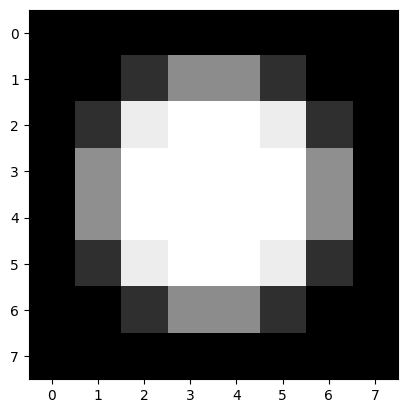

In [ ]:
qc_gray = neqr_class.image_quantum_circuit(image=gray_pic, measurements=True)
# counts = backend.run(qc_gray, shots=shots).result().get_counts()
result = execute(qc_gray, simulator, shots=1024).result()
counts = result.get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=gray_pic.shape)

plt.imshow(image,cmap='gray')
plt.savefig("NEQR.png")

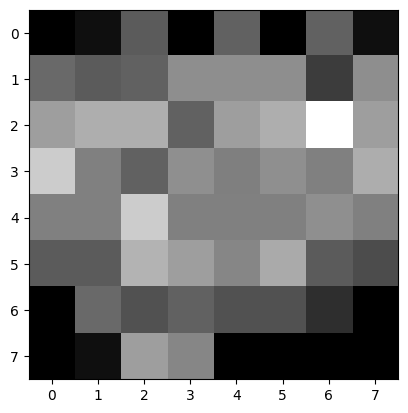

In [ ]:




def get_noise(p_error):
    error_gate1 = depolarizing_error(p_error, 1)
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate1, ['h', 'x'])
    return noise_model

noise_model = get_noise(0.01)

result = execute(qc_gray, simulator, shots=1024, noise_model=noise_model).result()
counts_noise = result.get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts_noise, image_shape=gray_pic.shape, is_noisy=True)
plt.imshow(image,cmap = 'gray')
plt.savefig("NEQR_depol.png")


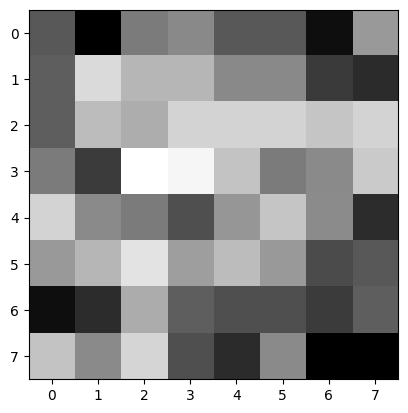

In [ ]:
noise_model = get_noise_bit_flip(0.01)
result = execute(qc_gray, simulator, shots=1024, noise_model=noise_model).result()
counts_noise = result.get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts_noise, image_shape=gray_pic.shape, is_noisy=True)

plt.imshow(image,cmap = 'gray')
plt.savefig("NEQR_bit_flip.png")

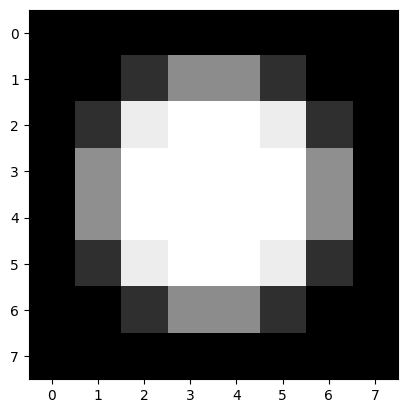

In [ ]:
noise_model = get_noise_phase_flip(0.01)
result = execute(qc_gray, simulator, shots=1024, noise_model=noise_model).result()
counts_noise = result.get_counts()
image = neqr_class.reconstruct_image_from_neqr_result(counts=counts_noise, image_shape=gray_pic.shape, is_noisy=True)

plt.imshow(image,cmap = 'gray')
plt.savefig("NEQR_phase_flip.png")

In [ ]:
PSNR_depol_neqr = []
PSNR_bit_neqr = []
PSNR_phase_neqr = []
gray_pic = image_data.reshape((8,8))/255.
image = image_data.reshape(8,8)
for error_percentage in [0.01,0.02,0.05,0.1,0.2]:
  noise_model = get_noise(error_percentage)
  qc_gray = neqr_class.image_quantum_circuit(image=gray_pic, measurements=True)
  # counts = backend.run(qc_gray, shots=shots).result().get_counts()
  result = execute(qc_gray, simulator, shots=1024, noise_model=noise_model).result()
  counts_noise = result.get_counts()
  retrieve_image = neqr_class.reconstruct_image_from_neqr_result(counts=counts_noise, image_shape=gray_pic.shape, is_noisy=True)
  PSNR_depol_neqr.append(calculate_psnr(image,retrieve_image))
  print(calculate_psnr(image,retrieve_image))

  noise_model = get_noise_bit_flip(error_percentage)
  result = execute(qc_gray, simulator, shots=1024, noise_model=noise_model).result()
  counts_noise = result.get_counts()
  retrieve_image = neqr_class.reconstruct_image_from_neqr_result(counts=counts_noise, image_shape=gray_pic.shape, is_noisy=True)
  PSNR_bit_neqr.append(calculate_psnr(image,retrieve_image))
  print(calculate_psnr(image,retrieve_image))

  noise_model = get_noise_phase_flip(error_percentage)
  result = execute(qc_gray, simulator, shots=1024, noise_model=noise_model).result()
  counts_noise = result.get_counts()
  retrieve_image = neqr_class.reconstruct_image_from_neqr_result(counts=counts_noise, image_shape=gray_pic.shape, is_noisy=True)
  PSNR_phase_neqr.append(calculate_psnr(image,retrieve_image))
  print(calculate_psnr(image,retrieve_image))


8.403202222523953
8.009967148637479
inf
9.034380328059203
6.538673855616216
inf
6.698263367123099
6.097906649401787
inf
6.244209027068575
6.52091607500749
inf
6.50487568879236
6.0705325180744065
inf


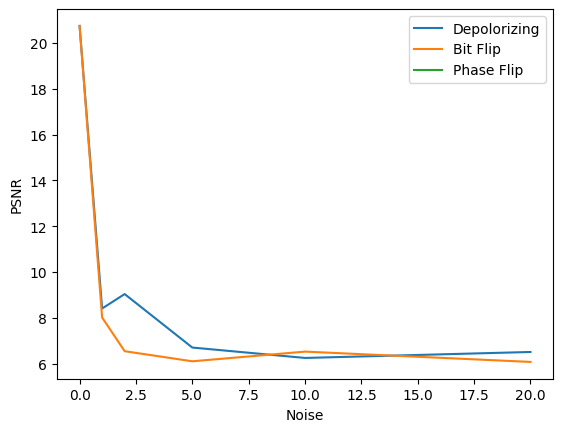

In [ ]:
plt.plot(np.array([0,0.01,0.02,0.05,0.1,0.2])*100,[20.74573376572848]+PSNR_depol_neqr,label='Depolorizing')
plt.plot(np.array([0,0.01,0.02,0.05,0.1,0.2])*100,[20.74573376572848]+PSNR_bit_neqr,label='Bit Flip')
plt.plot(np.array([0,0.01,0.02,0.05,0.1,0.2])*100,[20.74573376572848]+PSNR_phase_neqr,label='Phase Flip')
plt.legend()
plt.xlabel("Noise")
plt.ylabel("PSNR")
plt.savefig("noise_neqr.pdf")

In [ ]:
PSNR_shots_neqr = []
image = image_data.reshape(8,8)
gray_pic = image_data.reshape((8,8))/255.
image = image_data.reshape(8,8)
for shots in [16,64,128,512,1024,2048,10240]:
  qc_gray = neqr_class.image_quantum_circuit(image=gray_pic, measurements=True)
  # counts = backend.run(qc_gray, shots=shots).result().get_counts()
  result = execute(qc_gray, simulator, shots=shots).result()
  counts = result.get_counts()
  retrieve_image = neqr_class.reconstruct_image_from_neqr_result(counts=counts, image_shape=gray_pic.shape,is_noisy=True)
  PSNR_shots_neqr.append(calculate_psnr(image,retrieve_image))

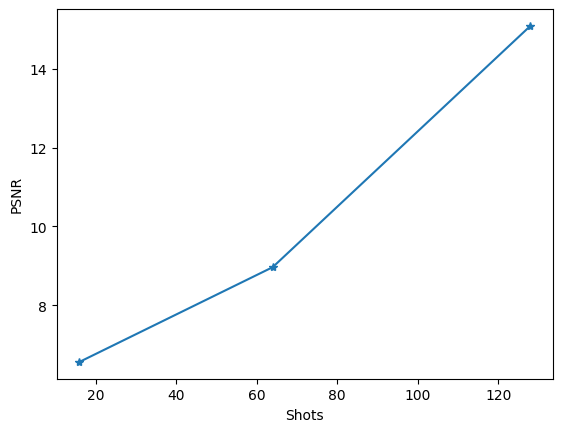

In [ ]:
plt.plot([16,64,128,512,1024,2048,10240],PSNR_shots_neqr,'*-')
plt.xlabel("Shots")
plt.ylabel("PSNR")
plt.savefig('NEQR_shots.pdf')

In [ ]:
PSNR_shots_neqr

[6.562634544478123, 8.965482792411464, 15.083610055482602, inf, inf, inf, inf]

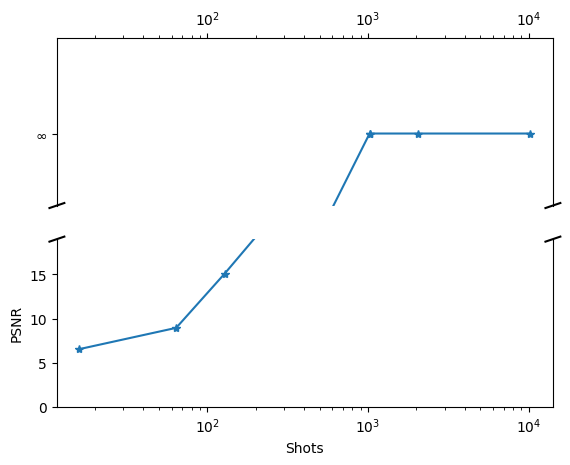

In [ ]:
"""
Broken axis example, where the y-axis will have a portion cut out.
"""
import matplotlib.pyplot as plt
import numpy as np


# 30 points between [0, 0.2) originally made using np.random.rand(30)*.2
pts = np.array([6.562634544478123, 8.965482792411464, 15.083610055482602,28, 98,100,100,100,100])


# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.plot([16,64,128,512,513,1023,1024,2048,10240],pts,'*-')
ax2.plot([16,64,128,512,513,1023,1024,2048,10240],pts,'*-')
plt.xscale('log')
# zoom-in / limit the view to different portions of the data
ax.set_ylim(98.5, 102)  # outliers only
ax2.set_ylim(0, 19)  # most of the data
ax.set_yticks([100])
ax.set_yticklabels(['$\infty$'])
# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.xlabel("Shots")
plt.ylabel("PSNR")
plt.savefig("NEQR_shots.pdf")

In [ ]:
pip install qiskit-ignis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.7/198.7 kB 5.3 MB/s eta 0:00:00


In [ ]:
print(counts)
print({key.replace(" ",""): value for key, value in counts.items()})

{'100111 00000000': 7, '111001 00000000': 6, '000111 00000000': 14, '010001 00101111': 13, '110101 00101111': 16, '000001 00000000': 17, '111101 00000000': 12, '001111 00000000': 22, '011001 10001111': 15, '011100 11111111': 24, '111111 00000000': 20, '110110 00000000': 15, '000110 00000000': 17, '110100 10001100': 26, '101100 11111111': 20, '010010 11101101': 18, '010110 00101111': 17, '101010 11101101': 19, '000000 00000000': 14, '110010 00101111': 17, '111011 00000000': 10, '000101 00000000': 8, '001011 10001100': 9, '110011 10001100': 16, '001001 00000000': 17, '101011 11111111': 16, '010101 11101101': 15, '110000 00000000': 20, '100101 11111111': 20, '110001 00000000': 17, '100011 11111111': 23, '001110 00000000': 11, '011000 00000000': 14, '001010 00101111': 13, '000100 00000000': 14, '000011 00000000': 14, '100001 10001111': 19, '010011 11111111': 14, '001000 00000000': 19, '111100 00000000': 22, '000010 00000000': 24, '101101 11101101': 26, '101001 00101111': 19, '010111 000000

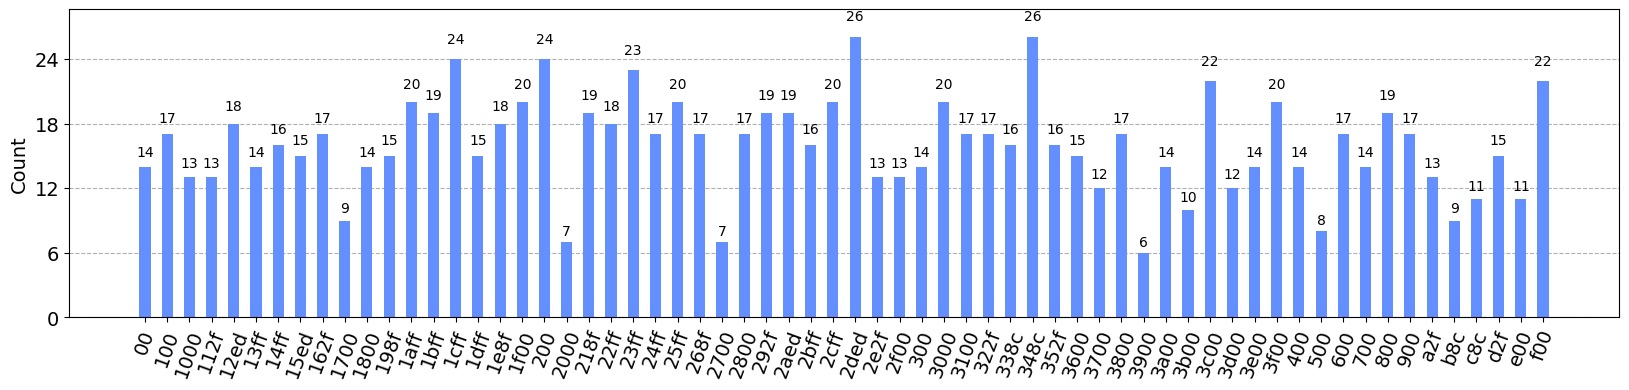

In [ ]:
fig, ax = plt.subplots(figsize=(20,4))
plot_histogram(to_hex({key.replace(" ",""): value for key, value in counts.items()}),ax=ax)
plt.savefig('NEQR_bar.pdf', bbox_inches='tight')

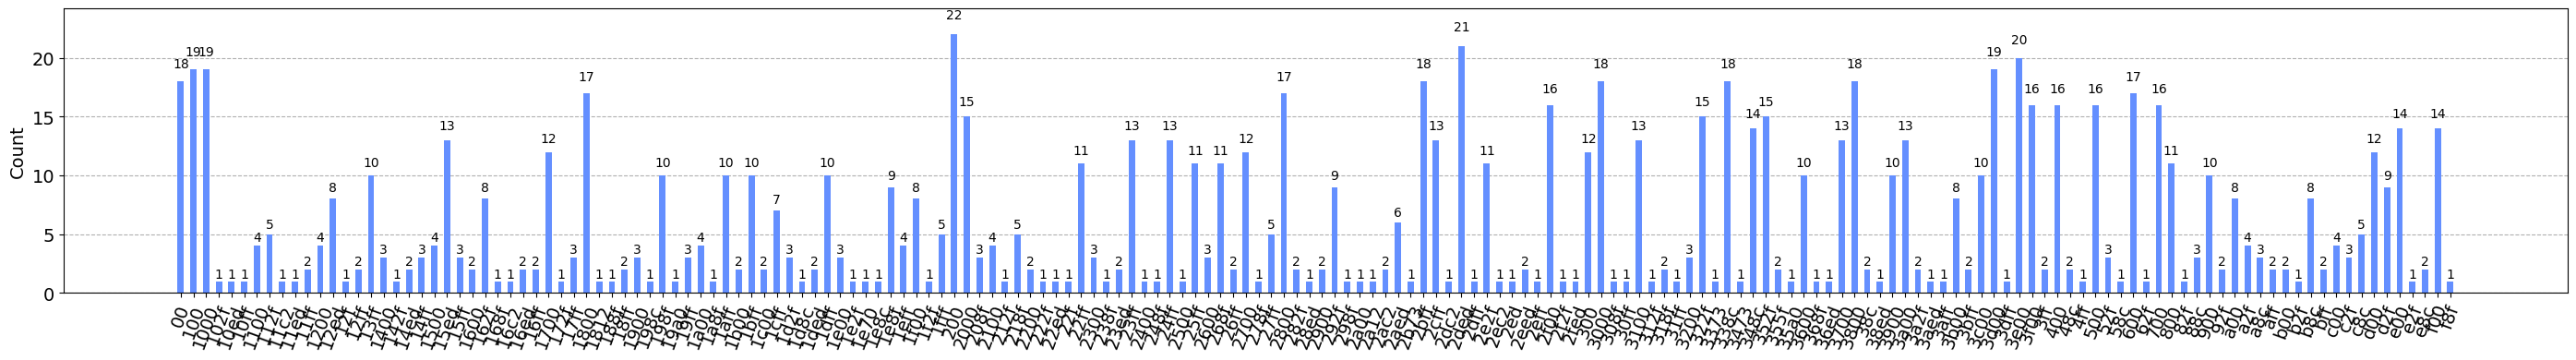

In [ ]:
fig, ax = plt.subplots(figsize=(35,4))
plot_histogram(to_hex({key.replace(" ",""): value for key, value in counts_noise.items()}),ax=ax)
plt.savefig('NEQR_depol_bar.pdf', bbox_inches='tight')

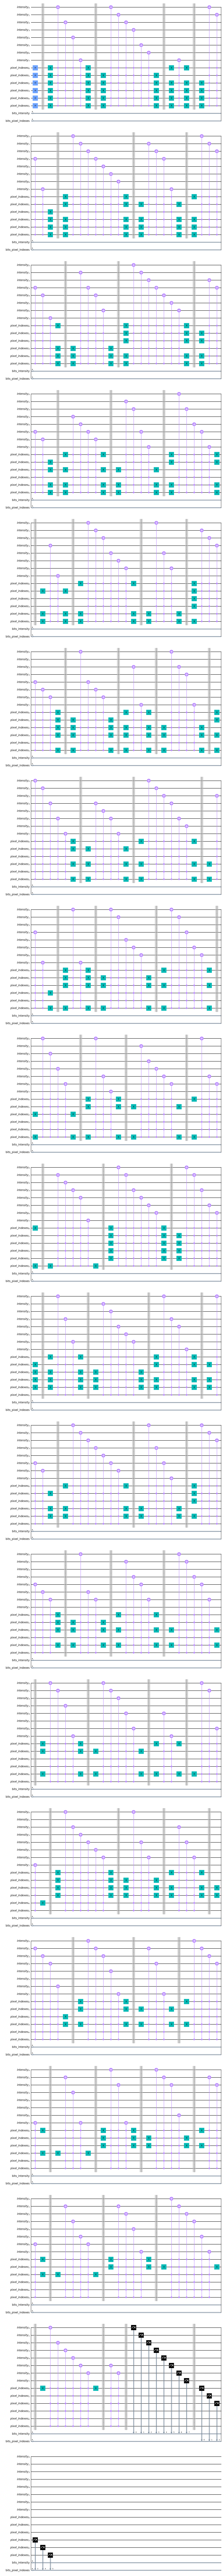

In [ ]:
qc_gray.draw(output = 'mpl', filename='NEQR.pdf')

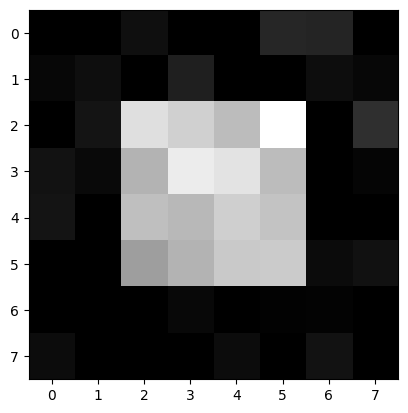

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the image size and square size
image_size = 8
square_size = 4

# Create a matrix of zeros
image = np.zeros((image_size, image_size))

# Define the intensity of the square
intensity = 200

# Create the square in the center of the image
start = (image_size - square_size) // 2
end = start + square_size
image[start:end, start:end] = intensity

# Add noise to the image
noise = np.random.normal(0, 20, (image_size, image_size))  # Gaussian noise
image = np.clip(image + noise, 0, 255)  # Add noise and ensure pixel values are within [0, 255]

# Display the image
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

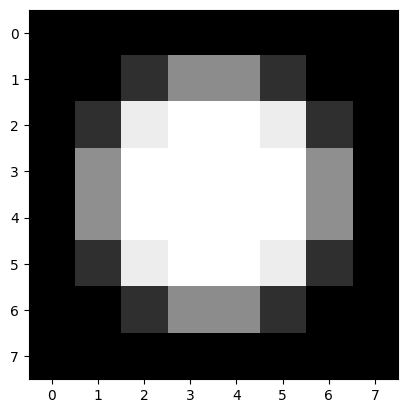

In [ ]:
plt.imshow(image, cmap='gray')
plt.show()

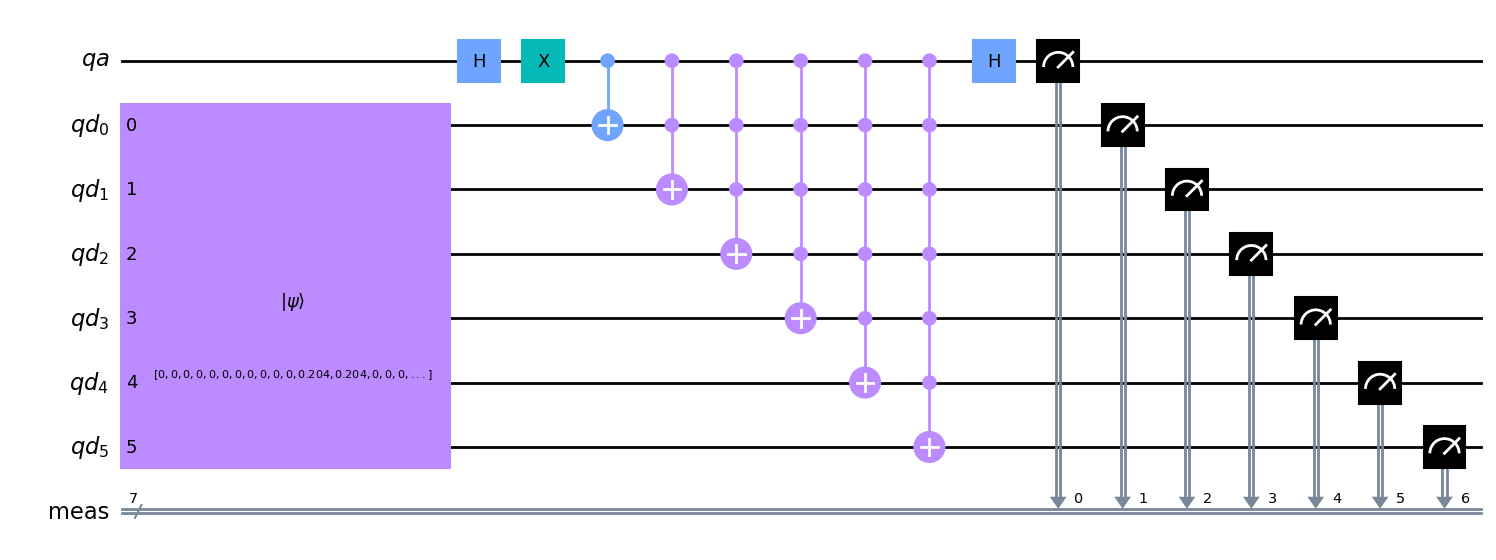

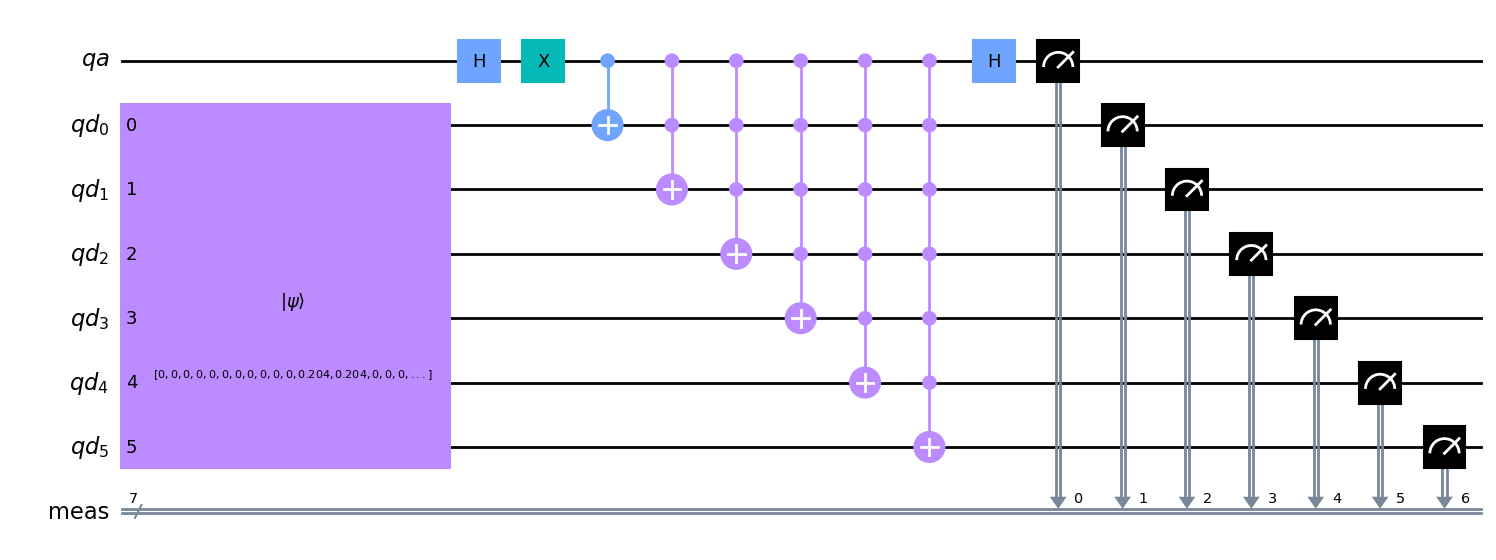

In [ ]:
total_qb = 7
data_qb = 6
anc_qb = 1

# Convert the raw pixel values to probability amplitudes
def amplitude_encode(img_data):

    # Calculate the RMS value
    rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))

    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms)

    # Return the normalized image as a numpy array
    return np.array(image_norm)


image_L = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 0, 1, 1, 1, 1, 0],
                  [0, 0, 0, 1, 1, 1, 1, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]])

image_L = image>0.5

# image_L = image_L/np.sum(image_L)
image_L = image_L.astype('int')
image_norm_h = amplitude_encode(image_L)
image_norm_v = amplitude_encode(image_L.T)

q_a = QuantumRegister(anc_qb, name='qa')
q_b = QuantumRegister(data_qb, name='qd')

# Create the circuit for horizontal scan
qc_h = QuantumCircuit(q_a, q_b)
qc_h.initialize(image_norm_h, range(1, total_qb))
qc_h.barrier()
qc_h.h(q_a)
qc_h.barrier()
qc_h.x(q_a)
qc_h.cx(q_a, q_b[0])
qc_h.ccx(q_a, q_b[0], q_b[1])
qc_h.mcx([q_a, q_b[0], q_b[1]], q_b[2])
qc_h.mcx([q_a, q_b[0], q_b[1], q_b[2]], q_b[3])
qc_h.mcx([q_a, q_b[0], q_b[1], q_b[2], q_b[3]], q_b[4])
qc_h.mcx([q_a, q_b[0], q_b[1], q_b[2], q_b[3], q_b[4]], q_b[5])
qc_h.barrier()
qc_h.h(q_a)
qc_h.measure_all()
display(qc_h.draw('mpl', fold=-1, plot_barriers=False))

# Create the circuit for vertical scan
qc_v = QuantumCircuit(q_a, q_b)
qc_v.initialize(image_norm_v, range(1, total_qb))
qc_v.barrier()
qc_v.h(q_a)
qc_v.barrier()
qc_v.x(q_a)
qc_v.cx(q_a, q_b[0])
qc_v.ccx(q_a, q_b[0], q_b[1])
qc_v.mcx([q_a, q_b[0], q_b[1]], q_b[2])
qc_v.mcx([q_a, q_b[0], q_b[1], q_b[2]], q_b[3])
qc_v.mcx([q_a, q_b[0], q_b[1], q_b[2], q_b[3]], q_b[4])
qc_v.mcx([q_a, q_b[0], q_b[1], q_b[2], q_b[3], q_b[4]], q_b[5])
qc_v.barrier()
qc_v.h(q_a)
qc_v.measure_all()
display(qc_v.draw('mpl', fold=-1, plot_barriers=False,filename='QHED_2.pdf'))

# Combine both circuits into a single list
circ_list = [qc_h, qc_v]

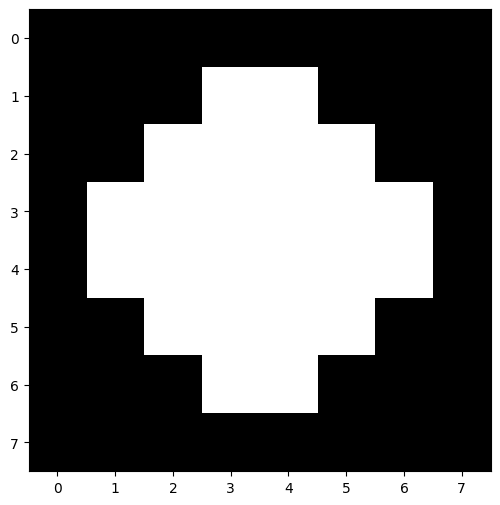

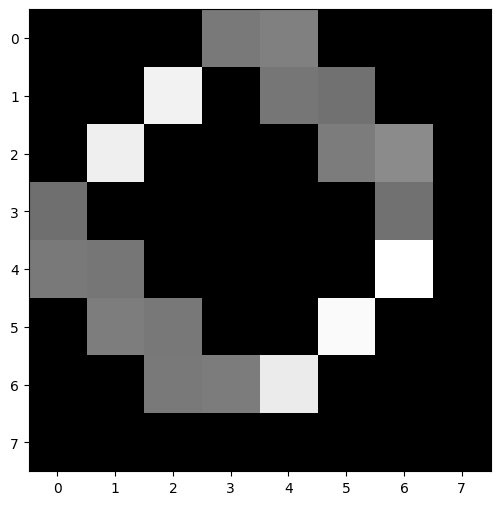

In [ ]:
# Initialise the qasm_simulator from the Aer package
sim = Aer.get_backend('qasm_simulator')
res = sim.run(circ_list, shots=32000).result()
sim_counts_h = res.get_counts(qc_h)
sim_counts_v = res.get_counts(qc_v)
# Get the measurement counts from the result
sim_keys_h = sim_counts_h.keys()
sim_keys_v = sim_counts_v.keys()

# Filter and extract the counts for odd-numbered states
# and make the full edge-detected image by adding horizontal and vertical scans
edge_scan_sim_h = np.array([sim_counts_h[f'{2*i+1:07b}'] if f'{2*i+1:07b}' in sim_keys_h else 0 for i in range(2**data_qb)]).reshape(2**(data_qb//2),2**(data_qb//2))
edge_scan_sim_v = np.array([sim_counts_v[f'{2*i+1:07b}'] if f'{2*i+1:07b}' in sim_keys_v else 0 for i in range(2**data_qb)]).reshape(2**(data_qb//2),2**(data_qb//2)).T
edge_detected_sim_L = edge_scan_sim_h + edge_scan_sim_v

# Plot all the simulator-run, hardware-run, and original images
fig, ax1= plt.subplots( figsize=(6,6))
ax1.imshow(image_L, cmap='gray')
plt.savefig("binary.png")
fig, ax1= plt.subplots( figsize=(6,6))
ax1.imshow(edge_detected_sim_L, cmap='gray')
plt.savefig("qhed.png")
# ax1.set_xticks(np.arange(0,2**(data_qb//2))-0.5)
# ax1.set_yticks(np.arange(0,2**(data_qb//2))-0.5)
# ax2.set_xticks(np.arange(0,2**(data_qb//2))-0.5)
# ax2.set_yticks(np.arange(0,2**(data_qb//2))-0.5)
# fig.set_facecolor("black")
plt.show()

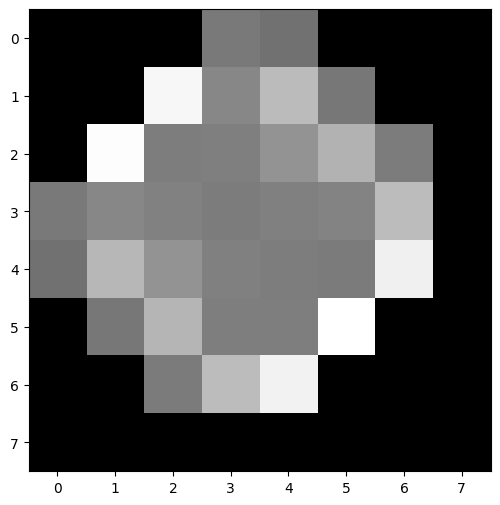

In [ ]:
def get_noise(p_error):
    error_gate1 = depolarizing_error(p_error, 1)
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate1, ['h', 'x'])
    return noise_model

noise_model = get_noise(0.1)

# Initialise the qasm_simulator from the Aer package
sim = Aer.get_backend('qasm_simulator')
res = sim.run(circ_list, shots=32000, noise_model=noise_model).result()
sim_counts_h = res.get_counts(qc_h)
sim_counts_v = res.get_counts(qc_v)
# Get the measurement counts from the result
sim_keys_h = sim_counts_h.keys()
sim_keys_v = sim_counts_v.keys()

# Filter and extract the counts for odd-numbered states
# and make the full edge-detected image by adding horizontal and vertical scans
edge_scan_sim_h = np.array([sim_counts_h[f'{2*i+1:07b}'] if f'{2*i+1:07b}' in sim_keys_h else 0 for i in range(2**data_qb)]).reshape(2**(data_qb//2),2**(data_qb//2))
edge_scan_sim_v = np.array([sim_counts_v[f'{2*i+1:07b}'] if f'{2*i+1:07b}' in sim_keys_v else 0 for i in range(2**data_qb)]).reshape(2**(data_qb//2),2**(data_qb//2)).T
edge_detected_sim_L = edge_scan_sim_h + edge_scan_sim_v

# Plot all the simulator-run, hardware-run, and original images
fig, ax1= plt.subplots( figsize=(6,6))
ax1.imshow(edge_detected_sim_L, cmap='gray')
plt.savefig("qhed_deplo.png")
plt.show()

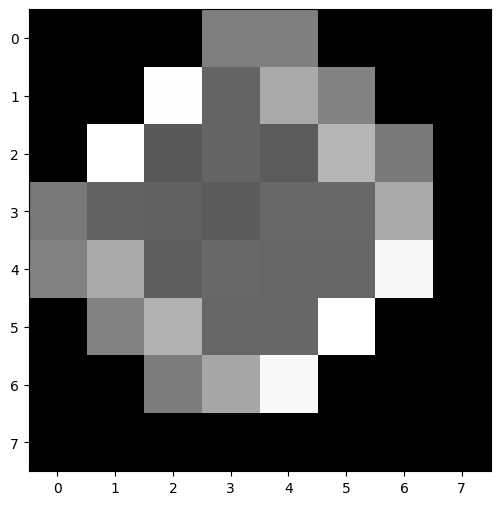

In [ ]:
noise_model = get_noise_bit_flip(0.1)

# Initialise the qasm_simulator from the Aer package
sim = Aer.get_backend('qasm_simulator')
res = sim.run(circ_list, shots=32000, noise_model=noise_model).result()
sim_counts_h = res.get_counts(qc_h)
sim_counts_v = res.get_counts(qc_v)
# Get the measurement counts from the result
sim_keys_h = sim_counts_h.keys()
sim_keys_v = sim_counts_v.keys()

# Filter and extract the counts for odd-numbered states
# and make the full edge-detected image by adding horizontal and vertical scans
edge_scan_sim_h = np.array([sim_counts_h[f'{2*i+1:07b}'] if f'{2*i+1:07b}' in sim_keys_h else 0 for i in range(2**data_qb)]).reshape(2**(data_qb//2),2**(data_qb//2))
edge_scan_sim_v = np.array([sim_counts_v[f'{2*i+1:07b}'] if f'{2*i+1:07b}' in sim_keys_v else 0 for i in range(2**data_qb)]).reshape(2**(data_qb//2),2**(data_qb//2)).T
edge_detected_sim_L = edge_scan_sim_h + edge_scan_sim_v

# Plot all the simulator-run, hardware-run, and original images
fig, ax1= plt.subplots( figsize=(6,6))
ax1.imshow(edge_detected_sim_L, cmap='gray')
plt.savefig("qhed_bit_flip.png")
plt.show()

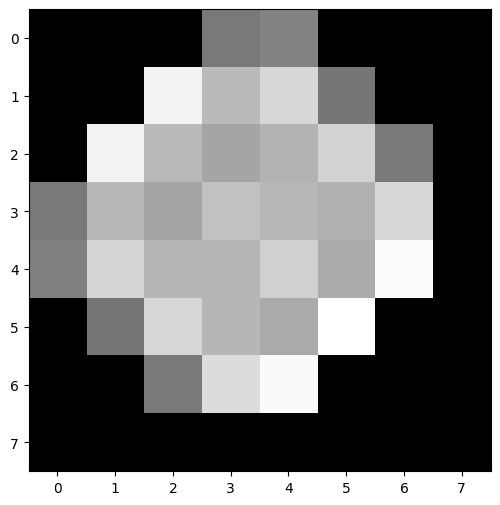

In [ ]:
noise_model = get_noise_phase_flip(0.1)

# Initialise the qasm_simulator from the Aer package
sim = Aer.get_backend('qasm_simulator')
res = sim.run(circ_list, shots=32000, noise_model=noise_model).result()
sim_counts_h = res.get_counts(qc_h)
sim_counts_v = res.get_counts(qc_v)
# Get the measurement counts from the result
sim_keys_h = sim_counts_h.keys()
sim_keys_v = sim_counts_v.keys()

# Filter and extract the counts for odd-numbered states
# and make the full edge-detected image by adding horizontal and vertical scans
edge_scan_sim_h = np.array([sim_counts_h[f'{2*i+1:07b}'] if f'{2*i+1:07b}' in sim_keys_h else 0 for i in range(2**data_qb)]).reshape(2**(data_qb//2),2**(data_qb//2))
edge_scan_sim_v = np.array([sim_counts_v[f'{2*i+1:07b}'] if f'{2*i+1:07b}' in sim_keys_v else 0 for i in range(2**data_qb)]).reshape(2**(data_qb//2),2**(data_qb//2)).T
edge_detected_sim_L = edge_scan_sim_h + edge_scan_sim_v

# Plot all the simulator-run, hardware-run, and original images
fig, ax1= plt.subplots( figsize=(6,6))
ax1.imshow(edge_detected_sim_L, cmap='gray')
plt.savefig("qhed_noise_flip.png")
plt.show()

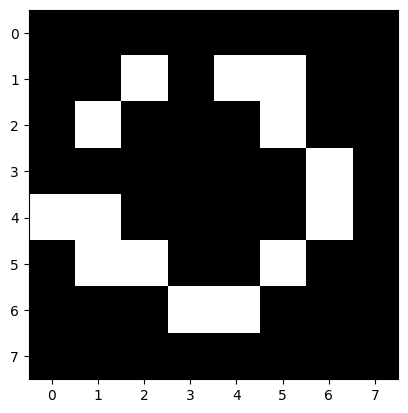

In [ ]:
plt.imshow(edge_detected_sim_L/np.max(edge_detected_sim_L)>0.5,cmap='gray')